In [ ]:
import pickle
import pandas as pd
file = open("/Users/KAUSTAV/Desktop/papers/data.pkl", "rb")
data = pickle.load(file)

In [ ]:
data

,title
0,Self-Organization of Associative Database and ...
1,A Mean Field Theory of Layer IV of Visual Cort...
2,Storing Covariance by the Associative Long-Ter...
3,Bayesian Query Construction for Neural Network...
4,"Neural Network Ensembles, Cross Validation, an..."
...,...
180520,Single Transistor Learning Synapses
180521,"Bias, Variance and the Combination of Least Sq..."
180522,A Real Time Clustering CMOS Neural Engine
180523,Learning direction in global motion: two class...


In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import SnowballStemmer
from nltk.stem.porter import *
import numpy as np

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KAUSTAV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
gist_file = open("/Users/KAUSTAV/Desktop/papers/stopwords/english.txt", "r")
try:
    content = gist_file.read()
    new_stopwords = content.split(",")
finally:
    gist_file.close()
new_stopwords = set(new_stopwords)

In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import WordPunctTokenizer
import string
import re
def clean_text_round2(text):
    text = str(text)
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    stops.update(['whether','sir', 'yes', 'no', 'last', 'fast', 'first', 'second', 'third', 'fourth','fifth', 'i', 'ii', 'iii', 'iv', 'v', 'vi', 
                  'vii', 'viii', 'ix', 'x', 'xi', 'xii', 'xiii', 'xiv', 'xv','xvi','xvii', 'xviii','xix','xx' ,'per', 'year', 'shri', 'new', 'old', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'zero'])
    stops = stops.union(new_stopwords)
    
    text = [w for w in text if not w in stops and len(w) >2]
    text = " ".join(text)
    
    # Data Cleaning
    text = re.sub(r"\\'", " ", text)
    text = re.sub(r"\\n", " ", text)
    text = re.sub(r'(?m)^\*.*\n?', '', text)
    text = re.sub('<.*?>', '', text)
    text = re.sub(';', '' , text, flags = re.IGNORECASE)
    text = re.sub('\w+', lambda x:'' if x.group().startswith('wh') else x.group(), text)
    text = re.sub(r"\b\d+\b", "", text)
    text = re.sub(" \d*", " ", text)
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r"  ", " ",text)

    ## Convert words to lower case and split them
    text = text.split()
    
    ## Remove stop words again
    text = [w for w in text if not w in stops and len(w) >2]
    text = " ".join(text)
    return text

round2 = lambda x : clean_text_round2(x)

In [ ]:
data_clean = pd.DataFrame(data.loc[:,'title'].apply(clean_text_round2))
data_clean.head()

,title
0,self organization associative database applica...
1,mean field theory layer visual cortex applicat...
2,storing covariance associative long term poten...
3,bayesian query construction neural network models
4,neural network ensembles cross validation acti...


In [ ]:
data_clean.loc[6,'title']

'plasticity mediated competitive learning'

In [ ]:
import pprint
text_corpus = data_clean['title'].values.tolist()

In [ ]:
stops = set(stopwords.words("english"))

stops.update(['whether','1st','2nd','sir', 'yes', 'no', 'last', 'fast', 'first', 'second', 'third', 'fourth','fifth', 'i', 'ii', 'iii', 'iv', 'v', 'vi', 'vii', 'viii', 'ix', 'x', 'xi', 'xii', 'xiii', 'xiv', 'xv','xvi','xvii', 'xviii','xix','xx' ,'per', 'year', 'shri', 'new', 'old', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'zero', 'time'])

stops = stops.union(new_stopwords)
# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.lower().split() if word not in stops]
         for document in text_corpus]

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
for id, text in enumerate(texts):
    for index,token in enumerate(text):
      if len(token)>1:
        text[index] = stemmer.stem(token)
      else:
        text.pop(index)
    text = list(set(text))
    texts[id] = text

In [ ]:
# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

In [ ]:
from operator import itemgetter 
res = dict(sorted(frequency.items(), key = itemgetter(1), reverse = True)[:20]) 
  
print("The top N value pairs are  " + str(res)) 

The top N value pairs are  {'learn': 3830, 'model': 2028, 'network': 1680, 'neural': 1458, 'optim': 1116, 'use': 1055, 'algorithm': 955, 'page': 814, 'deep': 755, 'process': 736, 'base': 714, 'estim': 695, 'machin': 676, 'analysi': 671, 'bayesian': 651, 'infer': 646, 'data': 637, 'method': 600, 'imag': 599, 'comput': 579}


In [ ]:
processed_corpus = [[token for token in text if frequency[token] > 5 and token not in stops and len(token) > 3] for text in texts]

from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

Dictionary(2806 unique tokens: ['applic', 'associ', 'databas', 'organ', 'self']...)


In [ ]:
pprint.pprint(dictionary.token2id)

{'aaai': 1699,
 'aaron': 2043,
 'abadi': 2789,
 'abbeel': 2060,
 'abil': 706,
 'absolut': 825,
 'abstract': 679,
 'academ': 1050,
 'academi': 2178,
 'acceler': 77,
 'access': 576,
 'account': 681,
 'accur': 462,
 'accuraci': 566,
 'achiev': 970,
 'acoust': 494,
 'acquisit': 403,
 'across': 1200,
 'action': 378,
 'activ': 25,
 'actor': 536,
 'acycl': 1673,
 'adaboost': 924,
 'adam': 2203,
 'adapt': 141,
 'addit': 1103,
 'address': 1145,
 'aditya': 2690,
 'adjust': 1602,
 'admm': 2441,
 'advanc': 712,
 'adversari': 1456,
 'advertis': 1345,
 'advic': 1222,
 'affect': 1307,
 'affin': 802,
 'afshin': 2192,
 'agarw': 1787,
 'agent': 1062,
 'aggreg': 1260,
 'aggress': 1187,
 'agnost': 700,
 'agraw': 2370,
 'agreement': 1149,
 'airoldi': 2634,
 'aistat': 1441,
 'ajakan': 2759,
 'alain': 2373,
 'alan': 1333,
 'alessandro': 2552,
 'alex': 1984,
 'alexand': 1864,
 'alexandr': 2499,
 'alexandro': 2677,
 'alfr': 1972,
 'algebra': 824,
 'algorithm': 50,
 'aliferi': 2481,
 'align': 1070,
 'allan': 17

 'easi': 1444,
 'eccv': 1381,
 'ecml': 1615,
 'econom': 961,
 'econometr': 2455,
 'edit': 1446,
 'editor': 739,
 'edward': 1669,
 'effect': 249,
 'effici': 537,
 'efro': 1378,
 'ehing': 2181,
 'eigenvalu': 1065,
 'eigenvector': 2017,
 'eisner': 2468,
 'either': 2212,
 'elad': 1956,
 'elast': 1674,
 'electr': 528,
 'electron': 593,
 'element': 786,
 'elementari': 695,
 'elicit': 1928,
 'elimin': 1432,
 'ellipt': 1947,
 'elsevi': 2186,
 'embed': 619,
 'emerg': 849,
 'emnlp': 1727,
 'emot': 476,
 'empir': 177,
 'employ': 1301,
 'enabl': 1012,
 'encod': 747,
 'energi': 465,
 'enforc': 2124,
 'engin': 1042,
 'english': 736,
 'enhanc': 782,
 'enough': 226,
 'ensembl': 27,
 'entiti': 1639,
 'entri': 1748,
 'entropi': 178,
 'environ': 427,
 'episod': 2415,
 'equal': 344,
 'equat': 466,
 'equilibria': 1283,
 'equilibrium': 1132,
 'equival': 626,
 'erez': 1998,
 'erhan': 2525,
 'eric': 1843,
 'ermon': 2744,
 'ernst': 2042,
 'error': 275,
 'especi': 1533,
 'espeholt': 2769,
 'estim': 126,
 'eucli

 'nonconvex': 2345,
 'nonlinear': 185,
 'nonneg': 992,
 'nonparametr': 804,
 'nonparanorm': 1948,
 'nonsmooth': 1315,
 'nonstationari': 941,
 'norm': 820,
 'normal': 85,
 'note': 668,
 'novel': 443,
 'novelti': 985,
 'novemb': 669,
 'nowak': 2333,
 'nski': 2460,
 'number': 974,
 'numer': 1192,
 'nystr': 1034,
 'obermay': 2207,
 'object': 188,
 'obozinski': 1953,
 'observ': 639,
 'obtain': 1352,
 'occlus': 450,
 'occurr': 1268,
 'octob': 1735,
 'ocular': 72,
 'offic': 1858,
 'offlin': 1000,
 'often': 2310,
 'ohad': 2452,
 'olfactori': 705,
 'oliv': 1073,
 'olivi': 2010,
 'olkopf': 1372,
 'olshen': 237,
 'onlin': 580,
 'onset': 119,
 'open': 591,
 'oper': 697,
 'opinion': 768,
 'opper': 1791,
 'opportun': 2624,
 'optic': 798,
 'optim': 76,
 'optimis': 907,
 'optimist': 1068,
 'optimum': 2414,
 'option': 554,
 'oracl': 1384,
 'order': 487,
 'ordin': 1091,
 'organ': 3,
 'orient': 90,
 'origin': 2343,
 'oriol': 2511,
 'orlitski': 2478,
 'orthogon': 1788,
 'oscil': 251,
 'oscillatori': 943,


 'vladimir': 1841,
 'vlahava': 1916,
 'vlassi': 1908,
 'vldb': 1502,
 'vlsi': 34,
 'vocabulari': 1109,
 'voic': 1172,
 'volatil': 40,
 'volinski': 2307,
 'volker': 1337,
 'volum': 1286,
 'volumetr': 2067,
 'vondrak': 2418,
 'vote': 1306,
 'wagner': 1241,
 'wainwright': 1914,
 'walk': 1019,
 'walker': 2485,
 'walsh': 2085,
 'walter': 2233,
 'wang': 1574,
 'ward': 2245,
 'warmuth': 1820,
 'warp': 1220,
 'washington': 1829,
 'wasserman': 1696,
 'wasserstein': 2605,
 'watt': 2416,
 'wavelet': 193,
 'weak': 529,
 'weber': 2099,
 'wehenkel': 2231,
 'weight': 264,
 'weinberg': 2201,
 'weiss': 1338,
 'welch': 2395,
 'welind': 2643,
 'well': 965,
 'weston': 967,
 'wibisono': 2575,
 'wide': 1259,
 'width': 996,
 'wierstra': 2604,
 'wild': 1911,
 'wiley': 899,
 'william': 762,
 'williamson': 671,
 'willski': 1334,
 'wilson': 978,
 'wiltschko': 2751,
 'window': 987,
 'winner': 149,
 'wise': 1370,
 'within': 1296,
 'without': 415,
 'wojciech': 2527,
 'wolf': 1810,
 'wood': 2232,
 'woodruff': 2281,


In [ ]:
corpus = [dictionary.doc2bow(text) for text in processed_corpus]
pprint.pprint(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(0, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1)],
 [(1, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)],
 [(10, 1), (11, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(10, 1), (11, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)],
 [(11, 1), (23, 1), (30, 1)],
 [(28, 1), (31, 1), (32, 1)],
 [(10, 1), (11, 1), (33, 1), (34, 1)],
 [(10, 1), (11, 1), (35, 1), (36, 1)],
 [(37, 1), (38, 1), (39, 1), (40, 1)],
 [(28, 1), (41, 1), (42, 1)],
 [(43, 1), (44, 1), (45, 1), (46, 1)],
 [(10, 1), (11, 1), (47, 1), (48, 1), (49, 1)],
 [(50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1)],
 [(23, 1), (28, 1), (56, 1), (57, 1), (58, 1), (59, 1)],
 [(23, 1), (25, 1), (28, 1), (60, 1)],
 [(33, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1)],
 [(3, 1),
  (4, 1),
  (6, 1),
  (13, 1),
  (23, 1),
  (66, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
 

  (587, 1),
  (653, 1),
  (697, 1),
  (754, 1)],
 [(46, 1), (97, 1), (229, 1), (456, 1)],
 [(38, 1), (117, 1), (216, 1), (217, 1)],
 [(25, 1), (33, 1), (97, 1), (265, 1), (483, 1)],
 [],
 [(60, 1), (377, 1), (485, 1), (487, 1), (600, 1), (676, 1), (851, 1)],
 [(129, 1), (142, 1), (275, 1), (290, 1), (295, 1)],
 [(313, 1), (337, 1), (627, 1), (1059, 1)],
 [(23, 1), (28, 1), (44, 1), (306, 1), (992, 1), (1059, 1)],
 [(295, 1), (396, 1), (513, 1), (926, 1)],
 [(50, 1), (171, 1), (186, 1), (627, 1), (764, 1), (839, 1)],
 [(25, 1), (28, 1), (801, 1), (858, 1)],
 [(340, 1), (653, 1), (1060, 1), (1061, 1)],
 [(97, 1), (265, 1), (483, 1)],
 [(10, 1), (106, 1), (348, 1), (501, 1)],
 [(295, 1), (296, 1), (329, 1), (830, 1)],
 [(28, 1), (93, 1), (940, 1), (1062, 1)],
 [(28, 1),
  (117, 1),
  (270, 1),
  (286, 1),
  (418, 1),
  (473, 1),
  (477, 1),
  (485, 1),
  (676, 1),
  (849, 1),
  (1063, 1)],
 [(28, 1), (57, 1), (122, 1), (557, 1), (1064, 1)],
 [(65, 1),
  (110, 1),
  (207, 1),
  (295, 1),
 

  (474, 1),
  (1151, 1)],
 [(11, 1), (65, 1), (84, 1), (106, 1), (126, 1), (441, 1), (862, 1)],
 [(63, 1), (336, 1), (858, 1)],
 [(0, 1), (33, 1), (63, 1), (223, 1)],
 [(63, 1), (92, 1), (133, 1), (135, 1), (235, 1), (411, 1), (974, 1)],
 [(28, 1), (178, 1), (263, 1), (336, 1), (895, 1)],
 [(10, 1),
  (29, 1),
  (36, 1),
  (126, 1),
  (180, 1),
  (326, 1),
  (367, 1),
  (819, 1),
  (1119, 1)],
 [(33, 1), (50, 1), (351, 1), (771, 1)],
 [(33, 1), (44, 1), (79, 1), (245, 1), (265, 1), (483, 1)],
 [(0, 1), (10, 1), (11, 1), (28, 1), (470, 1), (587, 1)],
 [(23, 1), (323, 1), (557, 1), (618, 1)],
 [(23, 1), (109, 1), (188, 1), (853, 1), (942, 1)],
 [(168, 1), (729, 1), (1230, 1)],
 [(326, 1), (367, 1), (411, 1), (450, 1), (557, 1), (804, 1), (1067, 1)],
 [(28, 1), (93, 1), (478, 1), (909, 1)],
 [(84, 1), (126, 1), (227, 1), (250, 1), (318, 1)],
 [(39, 1), (56, 1), (117, 1), (411, 1), (441, 1), (860, 1)],
 [(28, 1),
  (207, 1),
  (284, 1),
  (402, 1),
  (477, 1),
  (704, 1),
  (835, 1),
  (12

 [(10, 1), (103, 1), (178, 1), (255, 1), (399, 1), (639, 1), (790, 1)],
 [(65, 1), (207, 1), (289, 1), (580, 1), (1481, 1), (1482, 1)],
 [(10, 1), (255, 1), (869, 1), (1397, 1)],
 [(1483, 1)],
 [],
 [],
 [],
 [(1420, 1)],
 [(10, 1), (103, 1), (255, 1), (869, 1), (1208, 1), (1317, 1), (1420, 1)],
 [(10, 1),
  (103, 1),
  (178, 1),
  (238, 1),
  (239, 1),
  (255, 1),
  (399, 1),
  (1420, 1)],
 [(253, 1), (1484, 1)],
 [(6, 1),
  (92, 1),
  (101, 1),
  (106, 1),
  (342, 1),
  (396, 1),
  (412, 1),
  (481, 1),
  (705, 1)],
 [],
 [],
 [(65, 1),
  (84, 1),
  (91, 1),
  (92, 1),
  (133, 1),
  (195, 1),
  (225, 1),
  (339, 1),
  (357, 1)],
 [(188, 1), (276, 1), (385, 1)],
 [(28, 1), (76, 1), (93, 1), (151, 1), (273, 1), (1256, 1)],
 [(7, 1), (191, 1), (235, 1), (598, 1), (698, 1), (719, 1)],
 [(23, 1), (28, 1), (36, 1), (133, 1), (146, 1), (165, 1), (196, 1), (580, 1)],
 [(312, 1), (1143, 1)],
 [(7, 1),
  (44, 1),
  (130, 1),
  (235, 1),
  (255, 1),
  (351, 1),
  (556, 1),
  (598, 1),
  (895, 1

 [],
 [(1724, 1)],
 [(1331, 1)],
 [],
 [(28, 1), (58, 1), (97, 1), (898, 1), (977, 1), (1317, 1)],
 [(5, 1), (245, 1), (666, 1)],
 [(242, 1)],
 [(1725, 1)],
 [(10, 1), (11, 1), (66, 1), (109, 1), (253, 1), (693, 1), (1726, 1)],
 [(1727, 1)],
 [(967, 1)],
 [(242, 1)],
 [(1373, 1)],
 [],
 [],
 [],
 [(11, 1), (712, 1)],
 [],
 [],
 [(1373, 1)],
 [(1627, 1)],
 [],
 [(12, 1), (76, 1), (1318, 1)],
 [],
 [(60, 1), (1471, 1)],
 [(60, 1)],
 [],
 [],
 [(1048, 1)],
 [],
 [],
 [],
 [],
 [(1724, 1)],
 [],
 [],
 [(1320, 1)],
 [(1, 1), (10, 1), (11, 1), (60, 1), (116, 1), (148, 1)],
 [(11, 1), (23, 1), (65, 1), (126, 1), (219, 1), (489, 1), (747, 1)],
 [(1175, 1)],
 [(1728, 1)],
 [],
 [(0, 1),
  (196, 1),
  (336, 1),
  (362, 1),
  (465, 1),
  (717, 1),
  (895, 1),
  (1190, 1)],
 [(846, 1), (1060, 1), (1061, 1)],
 [(1729, 1)],
 [(279, 1), (482, 1), (858, 1), (1061, 1), (1522, 1)],
 [],
 [],
 [(1730, 1)],
 [(43, 1), (142, 1), (203, 1)],
 [(79, 1), (117, 1), (359, 1), (386, 1), (407, 1), (1012, 1), (1152

 [(122, 1), (254, 1), (284, 1), (675, 1), (835, 1), (1253, 1), (1871, 1)],
 [],
 [(56, 1), (284, 1), (556, 1), (629, 1)],
 [],
 [],
 [],
 [(253, 1), (879, 1), (1861, 1)],
 [(1884, 1)],
 [],
 [(28, 1),
  (58, 1),
  (97, 1),
  (122, 1),
  (142, 1),
  (242, 1),
  (364, 1),
  (823, 1),
  (898, 1),
  (1326, 1),
  (1551, 1)],
 [],
 [(692, 1)],
 [],
 [],
 [],
 [(95, 1), (263, 1), (617, 1), (719, 1), (797, 1), (1251, 1)],
 [(102, 1), (171, 1), (185, 1), (253, 1), (581, 1), (1817, 1)],
 [],
 [(1885, 1)],
 [(50, 1), (95, 1), (744, 1), (797, 1), (1403, 1)],
 [],
 [(1732, 1)],
 [],
 [(0, 1), (263, 1), (487, 1), (718, 1), (719, 1), (1006, 1), (1661, 1)],
 [],
 [(0, 1), (263, 1), (526, 1), (718, 1), (719, 1), (1661, 1)],
 [(1886, 1)],
 [(898, 1), (1887, 1)],
 [(526, 1), (562, 1), (1747, 1), (1748, 1), (1749, 1)],
 [],
 [],
 [(65, 1),
  (170, 1),
  (261, 1),
  (268, 1),
  (514, 1),
  (998, 1),
  (1065, 1),
  (1191, 1),
  (1237, 1),
  (1320, 1)],
 [(65, 1),
  (263, 1),
  (381, 1),
  (456, 1),
  (526, 

  (456, 1),
  (1479, 1)],
 [(24, 1), (28, 1), (229, 1), (379, 1), (869, 1), (981, 1)],
 [(126, 1), (250, 1), (473, 1), (635, 1), (1479, 1), (1633, 1)],
 [(91, 1), (147, 1), (400, 1), (973, 1), (1604, 1)],
 [(2040, 1)],
 [],
 [],
 [],
 [],
 [(967, 1)],
 [(1711, 1)],
 [(2, 1), (25, 1), (28, 1), (229, 1), (316, 1), (477, 1), (1318, 1)],
 [(1732, 1)],
 [],
 [(229, 1), (245, 1), (257, 1), (510, 1)],
 [(44, 1), (55, 1), (97, 1), (229, 1), (265, 1), (1276, 1)],
 [],
 [],
 [],
 [(229, 1), (477, 1), (685, 1), (741, 1), (791, 1), (1041, 1), (1605, 1)],
 [],
 [(28, 1), (97, 1), (355, 1), (444, 1), (487, 1)],
 [(2041, 1)],
 [],
 [],
 [(1526, 1)],
 [(882, 1)],
 [],
 [(882, 1)],
 [],
 [],
 [(13, 1), (23, 1), (62, 1), (67, 1), (111, 1), (387, 1), (461, 1), (2042, 1)],
 [],
 [],
 [(13, 1), (28, 1), (111, 1), (188, 1), (556, 1)],
 [(691, 1)],
 [(739, 1)],
 [(485, 1)],
 [],
 [(36, 1), (109, 1), (188, 1), (330, 1), (877, 1)],
 [(1593, 1), (2043, 1)],
 [(691, 1)],
 [(2044, 1), (2045, 1)],
 [(2, 1), (239, 

 [(28, 1),
  (76, 1),
  (165, 1),
  (276, 1),
  (488, 1),
  (627, 1),
  (826, 1),
  (1025, 1)],
 [(28, 1), (62, 1), (93, 1), (173, 1), (372, 1), (627, 1)],
 [(23, 1),
  (28, 1),
  (62, 1),
  (93, 1),
  (242, 1),
  (382, 1),
  (619, 1),
  (638, 1),
  (976, 1),
  (1317, 1),
  (1552, 1)],
 [(1175, 1)],
 [],
 [(101, 1), (133, 1), (207, 1), (229, 1), (440, 1), (643, 1), (1037, 1)],
 [],
 [(50, 1), (106, 1), (1242, 1), (1520, 1), (2118, 1)],
 [(65, 1), (133, 1), (142, 1), (187, 1)],
 [],
 [(515, 1), (526, 1), (1248, 1), (1340, 1)],
 [],
 [(106, 1), (286, 1), (295, 1), (296, 1), (811, 1), (1099, 1), (1318, 1)],
 [],
 [(10, 1),
  (62, 1),
  (233, 1),
  (247, 1),
  (250, 1),
  (487, 1),
  (714, 1),
  (1833, 1)],
 [(23, 1), (35, 1), (411, 1), (1204, 1), (1563, 1)],
 [(23, 1), (618, 1), (904, 1)],
 [(23, 1), (255, 1), (858, 1), (904, 1)],
 [],
 [],
 [(2119, 1)],
 [],
 [(1175, 1)],
 [(340, 1), (487, 1), (858, 1), (883, 1), (997, 1), (2028, 1)],
 [],
 [(2120, 1)],
 [],
 [(62, 1), (91, 1), (858, 1),

  (28, 1),
  (58, 1),
  (99, 1),
  (106, 1),
  (219, 1),
  (330, 1),
  (1085, 1),
  (1318, 1),
  (1359, 1),
  (1852, 1)],
 [(50, 1), (106, 1), (235, 1)],
 [],
 [],
 [(1430, 1)],
 [],
 [],
 [],
 [(306, 1), (607, 1), (631, 1), (1129, 1), (2201, 1)],
 [],
 [],
 [],
 [(11, 1),
  (106, 1),
  (170, 1),
  (185, 1),
  (295, 1),
  (296, 1),
  (627, 1),
  (979, 1),
  (1065, 1)],
 [],
 [(112, 1),
  (185, 1),
  (244, 1),
  (362, 1),
  (698, 1),
  (717, 1),
  (748, 1),
  (1809, 1)],
 [],
 [(50, 1), (66, 1), (120, 1), (312, 1), (631, 1), (811, 1)],
 [],
 [(126, 1), (763, 1), (2202, 1)],
 [(28, 1), (816, 1), (2017, 1)],
 [(21, 1), (23, 1), (28, 1), (175, 1), (286, 1), (464, 1), (598, 1)],
 [(66, 1), (101, 1), (549, 1), (583, 1), (604, 1), (639, 1)],
 [],
 [(2203, 1)],
 [(253, 1), (693, 1), (882, 1), (1175, 1)],
 [(343, 1), (583, 1), (998, 1), (1121, 1), (1298, 1), (2203, 1)],
 [],
 [(582, 1), (730, 1), (734, 1), (1453, 1), (1859, 1), (2182, 1)],
 [(10, 1),
  (58, 1),
  (101, 1),
  (180, 1),
  (295, 1

 [],
 [(76, 1), (566, 1), (868, 1), (1035, 1), (1420, 1), (1937, 1)],
 [],
 [(1822, 1)],
 [(102, 1), (289, 1), (364, 1), (1784, 1), (1786, 1)],
 [(11, 1), (101, 1), (385, 1), (898, 1), (1525, 1)],
 [],
 [(28, 1), (166, 1), (206, 1), (1251, 1), (1808, 1), (1933, 1)],
 [],
 [],
 [(1821, 1)],
 [],
 [(24, 1), (76, 1), (364, 1), (511, 1), (816, 1)],
 [(10, 1), (11, 1), (96, 1), (477, 1), (938, 1), (1199, 1)],
 [(33, 1), (60, 1), (170, 1), (504, 1), (819, 1), (1125, 1)],
 [],
 [(295, 1), (316, 1), (456, 1), (627, 1), (2138, 1)],
 [],
 [],
 [(2041, 1)],
 [],
 [(44, 1), (125, 1), (316, 1), (386, 1), (1502, 1), (1904, 1)],
 [],
 [(289, 1), (598, 1), (1415, 1)],
 [],
 [],
 [(2265, 1)],
 [],
 [],
 [],
 [],
 [(50, 1), (257, 1), (1007, 1), (2028, 1)],
 [(249, 1), (257, 1), (715, 1), (1031, 1)],
 [(50, 1), (166, 1), (1292, 1)],
 [],
 [],
 [],
 [],
 [(2237, 1)],
 [],
 [],
 [(21, 1), (852, 1)],
 [],
 [],
 [],
 [(257, 1), (505, 1), (712, 1), (1699, 1), (2028, 1)],
 [(222, 1), (229, 1), (257, 1), (340, 

 [],
 [],
 [(2012, 1)],
 [],
 [(1680, 1)],
 [],
 [(2012, 1)],
 [],
 [],
 [(2055, 1)],
 [],
 [(66, 1), (1048, 1), (1049, 1)],
 [],
 [(2315, 1)],
 [(1382, 1)],
 [(1382, 1)],
 [],
 [],
 [],
 [],
 [(2316, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(1633, 1)],
 [],
 [],
 [(1317, 1)],
 [],
 [(1355, 1)],
 [],
 [],
 [(1465, 1)],
 [(1382, 1)],
 [(666, 1), (1049, 1)],
 [],
 [(21, 1), (23, 1), (25, 1), (28, 1), (733, 1), (2317, 1)],
 [(11, 1),
  (185, 1),
  (270, 1),
  (286, 1),
  (407, 1),
  (477, 1),
  (630, 1),
  (747, 1),
  (1202, 1),
  (2154, 1)],
 [],
 [(7, 1), (117, 1), (118, 1), (211, 1), (676, 1)],
 [],
 [],
 [],
 [(1430, 1)],
 [(1732, 1)],
 [(23, 1), (477, 1), (712, 1), (778, 1), (1035, 1), (2074, 1)],
 [],
 [],
 [(1101, 1), (1175, 1)],
 [(28, 1), (36, 1), (279, 1), (364, 1), (778, 1)],
 [],
 [],
 [],
 [(1101, 1), (1175, 1)],
 [(19, 1), (23, 1), (32, 1), (133, 1), (270, 1), (286, 1)],
 [],
 [(2092, 1)],
 [(619, 1), (1180, 1), (1216, 1)],
 [(13, 1),
  (20, 1),
  (23, 1),
  (44, 1),
 

  (92, 1),
  (130, 1),
  (154, 1),
  (184, 1),
  (193, 1),
  (515, 1),
  (898, 1),
  (1788, 1),
  (1887, 1),
  (1995, 1),
  (2189, 1)],
 [(1175, 1)],
 [(33, 1),
  (46, 1),
  (166, 1),
  (229, 1),
  (477, 1),
  (627, 1),
  (839, 1),
  (2184, 1)],
 [],
 [(1976, 1)],
 [(1175, 1)],
 [],
 [(50, 1), (106, 1), (234, 1), (330, 1), (387, 1), (510, 1)],
 [(1048, 1), (1175, 1)],
 [(11, 1), (217, 1), (510, 1), (712, 1), (834, 1), (994, 1), (1363, 1)],
 [(50, 1), (138, 1), (537, 1), (1956, 1)],
 [],
 [(2166, 1)],
 [(1765, 1)],
 [(1854, 1)],
 [],
 [(1873, 1)],
 [],
 [(28, 1),
  (279, 1),
  (286, 1),
  (304, 1),
  (351, 1),
  (477, 1),
  (1247, 1),
  (1331, 1)],
 [],
 [(327, 1), (552, 1), (810, 1), (1380, 1)],
 [(1, 1), (23, 1), (234, 1), (402, 1), (482, 1), (526, 1), (819, 1), (848, 1)],
 [],
 [(83, 1), (402, 1), (692, 1), (1111, 1), (1541, 1)],
 [(44, 1), (60, 1), (295, 1), (708, 1)],
 [],
 [(1666, 1)],
 [(11, 1),
  (23, 1),
  (100, 1),
  (101, 1),
  (146, 1),
  (234, 1),
  (289, 1),
  (402, 1),
  

 [],
 [(44, 1), (76, 1), (411, 1), (640, 1), (788, 1), (846, 1)],
 [(28, 1), (113, 1), (126, 1), (411, 1), (598, 1), (1506, 1)],
 [(414, 1), (919, 1)],
 [],
 [],
 [],
 [],
 [],
 [(22, 1), (583, 1), (2411, 1)],
 [],
 [],
 [(1463, 1)],
 [(1711, 1)],
 [(261, 1)],
 [(1468, 1)],
 [(1915, 1)],
 [],
 [],
 [(28, 1), (257, 1), (364, 1), (973, 1)],
 [(101, 1), (205, 1), (826, 1)],
 [],
 [(76, 1)],
 [(11, 1),
  (101, 1),
  (106, 1),
  (118, 1),
  (127, 1),
  (205, 1),
  (377, 1),
  (485, 1),
  (787, 1),
  (1657, 1)],
 [(958, 1)],
 [(1421, 1)],
 [(1421, 1)],
 [],
 [(1722, 1)],
 [],
 [(1722, 1)],
 [(62, 1), (101, 1), (368, 1), (447, 1), (466, 1)],
 [],
 [(50, 1), (230, 1), (375, 1), (560, 1), (594, 1), (919, 1), (1257, 1)],
 [(126, 1), (256, 1), (492, 1), (1247, 1), (1288, 1)],
 [(68, 1),
  (103, 1),
  (184, 1),
  (264, 1),
  (326, 1),
  (327, 1),
  (367, 1),
  (506, 1),
  (618, 1)],
 [(23, 1), (28, 1), (56, 1), (109, 1), (772, 1), (1210, 1)],
 [(165, 1), (195, 1), (225, 1), (306, 1), (362, 1), (56

 [(2018, 1)],
 [],
 [(23, 1), (207, 1), (466, 1), (504, 1), (858, 1), (893, 1), (1026, 1)],
 [],
 [(92, 1), (185, 1), (186, 1), (357, 1), (360, 1), (1026, 1), (2211, 1)],
 [],
 [(102, 1), (186, 1), (233, 1), (730, 1), (791, 1), (961, 1), (1026, 1)],
 [(35, 1), (295, 1), (504, 1), (713, 1), (899, 1)],
 [],
 [(56, 1), (316, 1), (478, 1), (871, 1), (2242, 1)],
 [],
 [(2155, 1)],
 [],
 [(23, 1),
  (46, 1),
  (99, 1),
  (203, 1),
  (486, 1),
  (807, 1),
  (1026, 1),
  (1692, 1)],
 [],
 [],
 [(1468, 1)],
 [],
 [(1950, 1)],
 [],
 [(23, 1), (249, 1), (355, 1), (1026, 1), (2257, 1)],
 [],
 [(1950, 1)],
 [(1551, 1)],
 [],
 [],
 [(693, 1), (858, 1), (882, 1), (2312, 1)],
 [(1421, 1)],
 [(23, 1),
  (44, 1),
  (492, 1),
  (517, 1),
  (858, 1),
  (1026, 1),
  (1048, 1),
  (1103, 1),
  (1372, 1)],
 [],
 [(2450, 1)],
 [(2450, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [(1410, 1), (1411, 1)],
 [(10, 1), (233, 1), (338, 1), (339, 1), (359, 1), (440, 1)],
 [],
 [],
 [(1419, 1)],
 [],
 [],
 [],
 [(2436, 1)],
 [(

 [],
 [(58, 1),
  (106, 1),
  (330, 1),
  (477, 1),
  (837, 1),
  (898, 1),
  (1048, 1),
  (1575, 1)],
 [(2392, 1)],
 [(1575, 1)],
 [],
 [],
 [(91, 1), (627, 1), (1048, 1), (1155, 1), (1913, 1)],
 [(57, 1), (452, 1), (903, 1), (965, 1), (1913, 1)],
 [],
 [],
 [],
 [],
 [(62, 1), (109, 1), (257, 1), (378, 1), (452, 1), (1057, 1), (1473, 1)],
 [],
 [(2122, 1)],
 [(23, 1), (133, 1), (148, 1), (378, 1), (788, 1), (1087, 1), (1412, 1)],
 [],
 [(1646, 1)],
 [(28, 1), (272, 1), (378, 1), (1381, 1), (1412, 1)],
 [(1122, 1)],
 [(386, 1), (449, 1), (653, 1), (1380, 1), (1712, 1), (1762, 1)],
 [(23, 1), (133, 1), (378, 1), (399, 1), (834, 1), (848, 1), (1767, 1)],
 [],
 [(338, 1), (378, 1), (399, 1), (546, 1), (653, 1), (1247, 1), (2114, 1)],
 [(103, 1),
  (115, 1),
  (148, 1),
  (163, 1),
  (378, 1),
  (1087, 1),
  (1831, 1),
  (2309, 1)],
 [],
 [],
 [],
 [(62, 1),
  (109, 1),
  (257, 1),
  (378, 1),
  (452, 1),
  (461, 1),
  (1057, 1),
  (1473, 1)],
 [],
 [(62, 1), (65, 1), (279, 1), (330, 1), 

 [],
 [(1335, 1)],
 [],
 [(28, 1), (284, 1), (386, 1), (1344, 1), (1369, 1), (1761, 1)],
 [],
 [],
 [(97, 1), (207, 1), (444, 1), (598, 1), (893, 1), (1594, 1)],
 [],
 [],
 [],
 [(1687, 1)],
 [],
 [(2184, 1)],
 [(1574, 1)],
 [(38, 1), (195, 1), (212, 1), (290, 1), (469, 1)],
 [(23, 1), (57, 1), (97, 1), (444, 1), (475, 1), (893, 1)],
 [(477, 1), (619, 1), (702, 1), (1112, 1), (1127, 1), (1369, 1)],
 [(2420, 1)],
 [],
 [(813, 1), (1863, 1)],
 [(1376, 1)],
 [(2134, 1)],
 [],
 [],
 [(2504, 1)],
 [(1536, 1)],
 [],
 [(1526, 1)],
 [(110, 1)],
 [(1048, 1)],
 [(2505, 1)],
 [(1606, 1)],
 [(2506, 1)],
 [],
 [],
 [(1594, 1)],
 [(2505, 1)],
 [],
 [(967, 1)],
 [(1973, 1)],
 [],
 [],
 [(1981, 1)],
 [(1314, 1)],
 [],
 [(1628, 1)],
 [(10, 1), (130, 1), (159, 1), (326, 1), (387, 1), (510, 1), (1061, 1)],
 [],
 [],
 [(351, 1), (510, 1), (651, 1), (1381, 1), (1762, 1), (2507, 1)],
 [],
 [(2078, 1), (2108, 1)],
 [(7, 1), (66, 1), (113, 1)],
 [(13, 1), (66, 1), (203, 1), (336, 1), (529, 1), (1183, 1)],
 [(

 [(12, 1), (106, 1), (208, 1), (262, 1), (1464, 1), (2136, 1)],
 [(76, 1), (263, 1), (555, 1), (1233, 1), (1256, 1), (1514, 1), (2093, 1)],
 [(33, 1), (276, 1), (397, 1), (400, 1), (401, 1)],
 [(10, 1),
  (28, 1),
  (92, 1),
  (166, 1),
  (210, 1),
  (241, 1),
  (357, 1),
  (360, 1),
  (950, 1)],
 [(385, 1), (488, 1), (574, 1), (602, 1), (1097, 1)],
 [(411, 1), (519, 1), (820, 1)],
 [(2323, 1)],
 [(177, 1), (257, 1), (273, 1), (807, 1), (1248, 1), (2036, 1)],
 [(28, 1), (93, 1), (203, 1), (675, 1)],
 [],
 [(1968, 1)],
 [(23, 1), (62, 1), (126, 1), (255, 1), (295, 1), (608, 1)],
 [(28, 1), (93, 1), (693, 1), (883, 1)],
 [(23, 1),
  (28, 1),
  (58, 1),
  (62, 1),
  (93, 1),
  (97, 1),
  (151, 1),
  (242, 1),
  (273, 1),
  (364, 1),
  (413, 1),
  (898, 1),
  (912, 1)],
 [],
 [],
 [(60, 1), (126, 1), (362, 1), (411, 1), (527, 1), (836, 1)],
 [(28, 1), (92, 1), (93, 1), (168, 1), (171, 1), (551, 1)],
 [(10, 1), (11, 1), (28, 1), (56, 1), (147, 1), (268, 1), (382, 1), (918, 1)],
 [(1865, 1)]

  (675, 1),
  (749, 1),
  (1141, 1),
  (1262, 1)],
 [(23, 1),
  (28, 1),
  (65, 1),
  (84, 1),
  (166, 1),
  (295, 1),
  (297, 1),
  (372, 1),
  (749, 1)],
 [(1101, 1), (1175, 1)],
 [],
 [(100, 1), (666, 1), (1646, 1)],
 [(739, 1)],
 [],
 [],
 [],
 [(2243, 1)],
 [],
 [(28, 1), (112, 1), (793, 1)],
 [(28, 1), (197, 1), (498, 1), (843, 1), (1775, 1)],
 [],
 [],
 [],
 [],
 [(1101, 1), (1175, 1)],
 [],
 [],
 [],
 [(1690, 1)],
 [],
 [],
 [(11, 1), (23, 1), (100, 1), (101, 1), (146, 1), (458, 1), (597, 1), (712, 1)],
 [],
 [],
 [(100, 1), (508, 1)],
 [],
 [(17, 1),
  (23, 1),
  (46, 1),
  (229, 1),
  (230, 1),
  (306, 1),
  (487, 1),
  (618, 1),
  (858, 1),
  (1257, 1)],
 [],
 [(126, 1), (1768, 1)],
 [(28, 1),
  (92, 1),
  (106, 1),
  (263, 1),
  (289, 1),
  (465, 1),
  (610, 1),
  (1338, 1)],
 [(188, 1), (386, 1), (387, 1), (848, 1), (1270, 1), (1938, 1)],
 [(2574, 1)],
 [(173, 1), (186, 1), (503, 1), (597, 1), (858, 1)],
 [(1857, 1)],
 [],
 [(28, 1), (276, 1), (1317, 1), (1596, 1), (2448, 

  (2468, 1)],
 [(56, 1), (160, 1), (195, 1), (234, 1), (966, 1), (1727, 1), (2468, 1)],
 [],
 [(60, 1), (316, 1), (386, 1), (456, 1), (627, 1)],
 [(50, 1), (106, 1)],
 [],
 [(126, 1), (166, 1), (794, 1)],
 [],
 [(50, 1), (316, 1), (386, 1), (580, 1), (627, 1), (1048, 1)],
 [(1739, 1), (2457, 1)],
 [],
 [],
 [(11, 1), (295, 1), (316, 1), (456, 1), (627, 1), (2138, 1)],
 [(44, 1), (125, 1), (316, 1), (386, 1), (977, 1), (1904, 1)],
 [],
 [],
 [(2607, 1)],
 [(693, 1), (760, 1)],
 [],
 [],
 [(233, 1), (257, 1), (627, 1), (807, 1)],
 [(541, 1)],
 [(129, 1), (197, 1), (233, 1), (257, 1), (279, 1), (414, 1)],
 [(1421, 1)],
 [],
 [(253, 1), (1629, 1)],
 [(1722, 1)],
 [],
 [(452, 1), (558, 1), (627, 1), (866, 1), (1106, 1), (1324, 1), (1546, 1)],
 [],
 [],
 [(233, 1), (791, 1)],
 [],
 [(9, 1), (95, 1), (411, 1), (795, 1)],
 [],
 [(41, 1), (289, 1), (332, 1), (672, 1), (1456, 1)],
 [],
 [],
 [(92, 1), (527, 1), (680, 1), (984, 1), (2019, 1)],
 [(76, 1), (97, 1), (265, 1), (414, 1), (483, 1)],
 [

 [],
 [(381, 1), (627, 1), (1372, 1), (1795, 1)],
 [(739, 1)],
 [],
 [],
 [(28, 1), (97, 1), (977, 1), (1342, 1), (1785, 1)],
 [(43, 1), (63, 1), (115, 1), (145, 1)],
 [],
 [(10, 1),
  (44, 1),
  (793, 1),
  (1042, 1),
  (1121, 1),
  (1211, 1),
  (1750, 1),
  (2223, 1)],
 [],
 [(1879, 1)],
 [],
 [(43, 1), (66, 1), (106, 1), (610, 1), (962, 1), (963, 1), (1318, 1)],
 [(43, 1), (101, 1), (719, 1), (1260, 1), (1318, 1), (1746, 1)],
 [],
 [(1470, 1)],
 [(127, 1), (145, 1), (163, 1), (184, 1), (329, 1), (556, 1), (954, 1)],
 [],
 [(43, 1), (115, 1), (1048, 1), (1056, 1), (1464, 1), (1525, 1), (2465, 1)],
 [],
 [(43, 1), (101, 1), (106, 1), (1056, 1), (2025, 1)],
 [(1048, 1), (1175, 1)],
 [],
 [],
 [],
 [(1175, 1)],
 [],
 [],
 [(1048, 1), (1175, 1)],
 [],
 [(2579, 1)],
 [],
 [(43, 1), (44, 1), (115, 1), (1211, 1), (1581, 1), (1885, 1)],
 [],
 [],
 [],
 [(23, 1), (126, 1), (129, 1), (255, 1), (702, 1)],
 [],
 [],
 [],
 [(60, 1), (297, 1), (809, 1)],
 [(26, 1), (29, 1), (273, 1), (275, 1), (38

 [(1421, 1), (2381, 1)],
 [(1101, 1), (1175, 1), (1793, 1), (2145, 1)],
 [(2656, 1)],
 [(336, 1), (379, 1), (895, 1), (1260, 1), (1261, 1)],
 [(234, 1), (235, 1), (627, 1), (777, 1), (846, 1)],
 [],
 [],
 [(1603, 1), (2657, 1)],
 [(185, 1),
  (362, 1),
  (484, 1),
  (717, 1),
  (1056, 1),
  (1656, 1),
  (1883, 1),
  (1941, 1),
  (2192, 1)],
 [(2658, 1)],
 [(515, 1), (1251, 1), (1293, 1), (1322, 1)],
 [],
 [],
 [(28, 1),
  (83, 1),
  (97, 1),
  (402, 1),
  (692, 1),
  (1111, 1),
  (1318, 1),
  (1537, 1)],
 [],
 [],
 [(44, 1), (106, 1), (125, 1), (244, 1), (447, 1), (631, 1), (1610, 1)],
 [(2659, 1)],
 [],
 [],
 [(2208, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [(50, 1),
  (146, 1),
  (220, 1),
  (306, 1),
  (372, 1),
  (377, 1),
  (487, 1),
  (1048, 1),
  (1124, 1),
  (1293, 1)],
 [],
 [(958, 1)],
 [(97, 1), (363, 1), (2241, 1)],
 [(12, 1), (46, 1), (101, 1), (260, 1), (461, 1), (684, 1)],
 [],
 [],
 [],
 [(13, 1), (62, 1), (63, 1), (461, 1), (1383, 1)],
 [(689, 1)],
 [],
 [],
 [],
 [],
 [(13

 [],
 [],
 [],
 [(1653, 1)],
 [],
 [(23, 1),
  (76, 1),
  (174, 1),
  (276, 1),
  (286, 1),
  (551, 1),
  (627, 1),
  (643, 1),
  (1103, 1)],
 [],
 [(14, 1),
  (50, 1),
  (59, 1),
  (126, 1),
  (286, 1),
  (368, 1),
  (785, 1),
  (1245, 1),
  (1287, 1)],
 [(1759, 1)],
 [],
 [(2630, 1)],
 [],
 [],
 [(23, 1), (63, 1), (126, 1), (848, 1), (1103, 1), (1418, 1)],
 [],
 [(0, 1), (465, 1), (713, 1)],
 [],
 [(2469, 1)],
 [],
 [(2469, 1)],
 [],
 [],
 [(186, 1), (207, 1), (289, 1), (385, 1), (614, 1)],
 [(721, 1), (1450, 1), (1656, 1)],
 [(28, 1),
  (58, 1),
  (80, 1),
  (84, 1),
  (97, 1),
  (196, 1),
  (242, 1),
  (898, 1),
  (957, 1),
  (967, 1),
  (1640, 1)],
 [(62, 1), (65, 1), (225, 1), (540, 1), (627, 1), (1317, 1)],
 [(28, 1), (84, 1), (186, 1), (207, 1), (540, 1), (627, 1)],
 [],
 [(79, 1),
  (95, 1),
  (196, 1),
  (207, 1),
  (289, 1),
  (336, 1),
  (540, 1),
  (627, 1),
  (697, 1),
  (1541, 1),
  (1891, 1)],
 [],
 [(975, 1), (1841, 1)],
 [],
 [(551, 1), (2401, 1)],
 [],
 [(76, 1)],
 [

 [(372, 1), (526, 1), (1293, 1), (1441, 1), (2430, 1)],
 [],
 [(2085, 1)],
 [],
 [],
 [(28, 1), (50, 1), (141, 1), (273, 1), (925, 1), (976, 1), (1941, 1)],
 [],
 [(1328, 1)],
 [],
 [(1681, 1)],
 [],
 [],
 [],
 [],
 [],
 [(37, 1)],
 [(1653, 1)],
 [(13, 1), (111, 1), (351, 1), (477, 1), (1923, 1), (2210, 1)],
 [(7, 1), (10, 1), (11, 1), (211, 1), (249, 1), (910, 1), (930, 1), (1369, 1)],
 [],
 [(2079, 1), (2199, 1)],
 [],
 [],
 [],
 [(2030, 1), (2591, 1)],
 [(2711, 1)],
 [(157, 1),
  (173, 1),
  (281, 1),
  (525, 1),
  (526, 1),
  (537, 1),
  (551, 1),
  (562, 1),
  (580, 1)],
 [(27, 1), (28, 1), (388, 1), (1369, 1)],
 [(28, 1),
  (68, 1),
  (136, 1),
  (188, 1),
  (189, 1),
  (336, 1),
  (415, 1),
  (604, 1),
  (634, 1)],
 [(28, 1), (487, 1), (537, 1), (580, 1), (1322, 1)],
 [],
 [(0, 1), (84, 1), (281, 1), (580, 1), (662, 1), (663, 1), (1272, 1)],
 [],
 [(28, 1), (85, 1), (580, 1), (1809, 1)],
 [(65, 1), (76, 1), (173, 1), (551, 1), (580, 1), (585, 1), (2157, 1)],
 [(46, 1), (76, 1), 

 [(1608, 1)],
 [(36, 1), (180, 1), (247, 1), (1041, 1), (1305, 1), (1348, 1)],
 [(28, 1), (336, 1), (385, 1), (703, 1), (895, 1), (1261, 1), (1317, 1)],
 [(76, 1), (241, 1), (414, 1), (1332, 1), (1500, 1)],
 [],
 [],
 [(1808, 1)],
 [(1463, 1)],
 [(1670, 1)],
 [(123, 1)],
 [(117, 1), (217, 1), (1082, 1)],
 [],
 [(1551, 1)],
 [],
 [(23, 1), (85, 1), (1082, 1), (2275, 1)],
 [],
 [(1739, 1), (2457, 1)],
 [],
 [(664, 1)],
 [],
 [(92, 1), (746, 1), (2732, 1)],
 [(217, 1), (753, 1), (1082, 1), (2732, 1)],
 [],
 [(13, 1), (279, 1), (2732, 1)],
 [],
 [(2732, 1)],
 [(330, 1), (675, 1), (1641, 1), (2042, 1)],
 [],
 [(479, 1), (1082, 1), (1253, 1), (1513, 1), (1613, 1)],
 [],
 [(21, 1), (267, 1), (278, 1), (858, 1)],
 [],
 [],
 [(122, 1), (295, 1), (352, 1), (435, 1), (670, 1)],
 [],
 [(3, 1), (13, 1), (79, 1), (670, 1)],
 [],
 [(927, 1), (1026, 1), (2732, 1)],
 [],
 [],
 [(117, 1), (270, 1), (625, 1), (2308, 1)],
 [],
 [(326, 1), (367, 1), (775, 1), (835, 1)],
 [(100, 1), (169, 1), (199, 1), (466

 [],
 [(1809, 1)],
 [(1719, 1)],
 [(2639, 1)],
 [(1656, 1), (1883, 1)],
 [(2235, 1)],
 [(242, 1), (2171, 1)],
 [],
 [(166, 1), (225, 1), (273, 1), (275, 1), (279, 1), (452, 1), (894, 1)],
 [(154, 1), (425, 1), (519, 1), (716, 1), (744, 1)],
 [],
 [(106, 1)],
 [(1914, 1)],
 [(1808, 1)],
 [],
 [(195, 1), (215, 1), (279, 1), (286, 1), (357, 1), (1048, 1), (1506, 1)],
 [],
 [],
 [(10, 1), (109, 1), (378, 1), (486, 1), (653, 1), (1398, 1)],
 [(252, 1), (413, 1), (1300, 1)],
 [(85, 1), (289, 1), (653, 1)],
 [],
 [],
 [(2005, 1)],
 [],
 [],
 [(2533, 1), (2587, 1)],
 [(10, 1), (125, 1), (755, 1), (877, 1), (910, 1), (1744, 1)],
 [],
 [(2379, 1)],
 [(2641, 1)],
 [(2641, 1)],
 [(2075, 1)],
 [(261, 1)],
 [],
 [(1903, 1)],
 [(11, 1), (33, 1), (910, 1), (1369, 1), (1594, 1), (2364, 1)],
 [],
 [(2523, 1)],
 [],
 [(13, 1), (109, 1), (111, 1), (378, 1), (1376, 1), (2057, 1)],
 [(57, 1), (378, 1), (1041, 1), (2309, 1), (2524, 1)],
 [(2742, 1), (2752, 1)],
 [(1531, 1), (2753, 1)],
 [(1596, 1)],
 [(1606,

 [(350, 1), (413, 1), (452, 1), (894, 1), (1317, 1), (1809, 1)],
 [(91, 1), (229, 1), (252, 1), (680, 1), (817, 1)],
 [(50, 1), (76, 1), (151, 1), (229, 1), (257, 1), (286, 1), (680, 1)],
 [(12, 1), (260, 1), (350, 1), (679, 1), (684, 1), (789, 1), (1952, 1)],
 [],
 [(2048, 1)],
 [(2673, 1)],
 [(28, 1),
  (35, 1),
  (57, 1),
  (93, 1),
  (485, 1),
  (1247, 1),
  (1369, 1),
  (2674, 1)],
 [],
 [],
 [(1447, 1)],
 [(50, 1), (76, 1), (91, 1), (184, 1), (273, 1), (551, 1), (913, 1)],
 [(9, 1), (166, 1), (413, 1), (1246, 1)],
 [(10, 1), (56, 1), (503, 1)],
 [],
 [(2628, 1)],
 [],
 [(1625, 1)],
 [(1574, 1)],
 [(28, 1),
  (279, 1),
  (305, 1),
  (653, 1),
  (1317, 1),
  (1376, 1),
  (2057, 1),
  (2584, 1)],
 [(10, 1), (55, 1), (1369, 1), (1548, 1)],
 [(143, 1), (653, 1), (675, 1), (1252, 1), (2748, 1)],
 [(261, 1), (2472, 1)],
 [],
 [(62, 1), (141, 1), (157, 1), (257, 1), (488, 1), (505, 1), (826, 1)],
 [(10, 1),
  (11, 1),
  (13, 1),
  (23, 1),
  (64, 1),
  (109, 1),
  (111, 1),
  (195, 1),
 

 [],
 [(114, 1), (191, 1), (411, 1), (2707, 1)],
 [(11, 1), (62, 1), (117, 1), (186, 1), (2027, 1), (2531, 1)],
 [(62, 1), (111, 1), (317, 1), (854, 1), (1529, 1), (2233, 1)],
 [],
 [(2011, 1), (2245, 1)],
 [(28, 1), (279, 1), (305, 1), (1369, 1), (2542, 1), (2710, 1)],
 [],
 [(1451, 1), (2728, 1)],
 [(23, 1),
  (44, 1),
  (413, 1),
  (477, 1),
  (1792, 1),
  (1923, 1),
  (2134, 1),
  (2210, 1)],
 [(1335, 1), (1835, 1)],
 [(2030, 1)],
 [(2030, 1)],
 [],
 [],
 [(1451, 1), (2728, 1)],
 [(2041, 1)],
 [(1606, 1)],
 [],
 [(10, 1), (11, 1), (28, 1), (142, 1), (2486, 1)],
 [],
 [(62, 1), (477, 1), (1297, 1), (1546, 1), (2420, 1), (2590, 1), (2608, 1)],
 [(1335, 1), (2489, 1)],
 [],
 [(2030, 1), (2591, 1)],
 [(11, 1),
  (13, 1),
  (111, 1),
  (464, 1),
  (477, 1),
  (2244, 1),
  (2355, 1),
  (2682, 1)],
 [],
 [(2640, 1)],
 [(1574, 1)],
 [(10, 1),
  (62, 1),
  (464, 1),
  (465, 1),
  (1456, 1),
  (1596, 1),
  (2180, 1),
  (2426, 1)],
 [(1389, 1), (2775, 1)],
 [(120, 1), (188, 1), (648, 1), (653

 [],
 [(207, 1), (250, 1), (402, 1), (1201, 1)],
 [],
 [(23, 1), (65, 1), (99, 1), (531, 1), (2172, 1)],
 [(1175, 1)],
 [],
 [(23, 1), (28, 1), (339, 1), (402, 1), (778, 1), (2730, 1)],
 [],
 [(515, 1), (989, 1), (1293, 1), (2547, 1)],
 [],
 [(2546, 1)],
 [],
 [],
 [],
 [(127, 1), (134, 1), (355, 1), (593, 1), (1036, 1)],
 [],
 [],
 [(23, 1), (28, 1), (50, 1), (255, 1), (359, 1), (988, 1), (1420, 1)],
 [],
 [(2172, 1)],
 [],
 [(101, 1), (255, 1), (359, 1), (474, 1), (1201, 1)],
 [],
 [],
 [],
 [(515, 1), (1137, 1), (1318, 1), (1320, 1)],
 [],
 [],
 [],
 [(69, 1), (249, 1), (478, 1), (627, 1), (1026, 1)],
 [],
 [(2735, 1)],
 [(56, 1), (486, 1), (515, 1), (2041, 1)],
 [],
 [],
 [],
 [],
 [(2464, 1)],
 [(1390, 1)],
 [(647, 1), (1836, 1)],
 [(25, 1), (28, 1), (84, 1), (166, 1), (1518, 1), (1792, 1)],
 [],
 [],
 [(1520, 1)],
 [],
 [(28, 1), (178, 1), (263, 1), (336, 1), (895, 1)],
 [(1175, 1)],
 [(1944, 1), (2008, 1)],
 [(253, 1), (1861, 1)],
 [(57, 1),
  (106, 1),
  (116, 1),
  (242, 1),
 

  (503, 1),
  (1048, 1),
  (1124, 1),
  (2335, 1)],
 [],
 [],
 [(2506, 1)],
 [(2598, 1)],
 [],
 [(76, 1), (618, 1), (799, 1), (1124, 1), (1338, 1)],
 [],
 [(477, 1),
  (485, 1),
  (514, 1),
  (589, 1),
  (1048, 1),
  (1124, 1),
  (1131, 1),
  (1338, 1)],
 [],
 [(2342, 1)],
 [],
 [(10, 1),
  (11, 1),
  (28, 1),
  (130, 1),
  (175, 1),
  (261, 1),
  (330, 1),
  (503, 1),
  (1247, 1)],
 [(1648, 1)],
 [(10, 1), (120, 1), (143, 1), (910, 1), (1061, 1), (1633, 1)],
 [(28, 1),
  (304, 1),
  (497, 1),
  (619, 1),
  (699, 1),
  (802, 1),
  (834, 1),
  (994, 1),
  (2180, 1)],
 [(50, 1), (62, 1), (185, 1), (492, 1), (568, 1), (597, 1), (1474, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [(10, 1), (11, 1), (49, 1), (304, 1), (1656, 1), (1883, 1), (2077, 1)],
 [],
 [],
 [],
 [],
 [],
 [(2644, 1), (2645, 1)],
 [],
 [(102, 1), (196, 1), (383, 1), (415, 1)],
 [],
 [(2262, 1), (2263, 1)],
 [(28, 1), (203, 1), (234, 1), (744, 1), (1371, 1)],
 [],
 [(23, 1), (1392, 1)],
 [],
 [(23, 1), (143, 1), (513, 1), (1201, 

  (839, 1),
  (993, 1),
  (1048, 1),
  (1124, 1),
  (1461, 1)],
 [],
 [(10, 1),
  (11, 1),
  (28, 1),
  (34, 1),
  (65, 1),
  (145, 1),
  (157, 1),
  (190, 1),
  (281, 1)],
 [(28, 1),
  (41, 1),
  (142, 1),
  (373, 1),
  (678, 1),
  (836, 1),
  (849, 1),
  (854, 1),
  (1062, 1)],
 [],
 [],
 [(126, 1), (157, 1), (326, 1), (1593, 1), (2043, 1)],
 [(50, 1), (76, 1), (130, 1), (173, 1)],
 [],
 [],
 [],
 [],
 [(28, 1), (854, 1)],
 [(2761, 1)],
 [(1642, 1), (2254, 1)],
 [],
 [(41, 1), (186, 1), (280, 1), (447, 1), (464, 1), (1046, 1)],
 [],
 [(10, 1), (11, 1), (37, 1), (1110, 1), (1335, 1), (1835, 1)],
 [(28, 1), (93, 1), (175, 1), (336, 1)],
 [],
 [(321, 1), (769, 1), (936, 1), (1120, 1), (2773, 1)],
 [(28, 1), (42, 1)],
 [],
 [(1669, 1)],
 [(221, 1), (373, 1), (1062, 1), (2216, 1), (2670, 1)],
 [(25, 1), (373, 1), (392, 1), (1047, 1), (1168, 1), (1551, 1)],
 [],
 [(191, 1), (411, 1), (2707, 1)],
 [(97, 1), (666, 1), (684, 1), (2216, 1), (2670, 1)],
 [(111, 1)],
 [],
 [],
 [],
 [(28, 1), (8

 [(23, 1), (87, 1), (99, 1), (141, 1), (165, 1), (202, 1)],
 [],
 [(1420, 1)],
 [(1713, 1)],
 [(2683, 1)],
 [(1323, 1)],
 [],
 [],
 [],
 [(146, 1), (854, 1)],
 [(23, 1), (55, 1), (62, 1), (110, 1), (163, 1), (377, 1), (835, 1), (1172, 1)],
 [],
 [],
 [(10, 1), (11, 1), (216, 1), (217, 1)],
 [(62, 1), (188, 1), (385, 1), (551, 1), (807, 1)],
 [],
 [(23, 1), (171, 1), (173, 1), (667, 1), (2460, 1)],
 [],
 [],
 [],
 [],
 [(10, 1), (92, 1), (579, 1), (790, 1), (1010, 1), (1369, 1)],
 [(28, 1), (191, 1), (464, 1), (1369, 1)],
 [],
 [(2048, 1)],
 [(2698, 1)],
 [],
 [],
 [(2453, 1)],
 [(1175, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(2428, 1)],
 [],
 [],
 [],
 [(50, 1), (340, 1), (414, 1), (566, 1), (858, 1)],
 [(1151, 1), (2310, 1)],
 [(1427, 1)],
 [(190, 1), (1089, 1), (1537, 1), (1557, 1), (2029, 1), (2361, 1)],
 [(1509, 1), (2204, 1)],
 [],
 [(139, 1), (255, 1), (308, 1), (582, 1), (2340, 1)],
 [(368, 1), (869, 1), (2030, 1), (2203, 1)],
 [(1708, 1)],
 [],
 [],
 [(137, 1), (139, 1),

 [(56, 1), (65, 1), (441, 1), (787, 1), (1293, 1), (2730, 1)],
 [],
 [(23, 1), (65, 1), (99, 1), (531, 1), (2172, 1), (2173, 1)],
 [(50, 1), (76, 1), (526, 1), (638, 1), (1540, 1)],
 [(738, 1), (1293, 1), (1656, 1)],
 [(76, 1), (276, 1), (397, 1), (698, 1), (2345, 1)],
 [(186, 1), (719, 1)],
 [(2546, 1)],
 [],
 [(28, 1), (515, 1), (664, 1), (1293, 1), (1506, 1)],
 [],
 [(76, 1), (133, 1), (147, 1), (698, 1), (1808, 1), (1933, 1)],
 [],
 [(1451, 1), (2708, 1)],
 [(515, 1), (1293, 1), (1945, 1)],
 [],
 [],
 [],
 [(62, 1), (375, 1), (487, 1), (623, 1), (1527, 1)],
 [],
 [(2586, 1), (2666, 1)],
 [],
 [],
 [(133, 1), (526, 1), (562, 1), (1006, 1), (1273, 1), (1656, 1)],
 [(8, 1), (10, 1), (11, 1), (28, 1), (359, 1), (467, 1), (993, 1)],
 [(208, 1), (1656, 1), (1883, 1), (2136, 1)],
 [],
 [(28, 1), (50, 1), (255, 1), (359, 1), (988, 1), (1420, 1), (1937, 1)],
 [],
 [],
 [],
 [(28, 1),
  (56, 1),
  (100, 1),
  (102, 1),
  (157, 1),
  (281, 1),
  (1886, 1),
  (1926, 1)],
 [],
 [(2379, 1)],
 [(

  (141, 1),
  (700, 1),
  (1249, 1),
  (1369, 1),
  (2694, 1),
  (2752, 1)],
 [(1429, 1)],
 [],
 [(33, 1), (910, 1), (1369, 1), (1594, 1), (1936, 1), (2364, 1)],
 [],
 [(1640, 1), (2246, 1)],
 [(1792, 1), (2134, 1)],
 [],
 [(2366, 1)],
 [],
 [(28, 1), (164, 1), (313, 1), (704, 1), (1613, 1), (2026, 1)],
 [(1175, 1)],
 [(2360, 1)],
 [(1764, 1)],
 [(23, 1),
  (91, 1),
  (173, 1),
  (200, 1),
  (464, 1),
  (858, 1),
  (1369, 1),
  (1656, 1),
  (1883, 1),
  (2603, 1),
  (2604, 1)],
 [(2443, 1)],
 [],
 [(1451, 1), (2036, 1)],
 [],
 [],
 [(2760, 1)],
 [(106, 1), (877, 1), (910, 1), (1048, 1), (2750, 1)],
 [],
 [(2747, 1)],
 [],
 [(28, 1),
  (229, 1),
  (400, 1),
  (574, 1),
  (869, 1),
  (894, 1),
  (1505, 1),
  (1789, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [(464, 1), (1456, 1)],
 [(379, 1), (464, 1)],
 [],
 [(171, 1)],
 [(2681, 1), (2777, 1)],
 [(23, 1), (464, 1), (477, 1), (1369, 1), (1606, 1)],
 [(28, 1), (234, 1), (1456, 1), (1633, 1), (1656, 1), (2217, 1)],
 [(769, 1)],
 [(11, 1), (55, 1),

 [(58, 1), (97, 1), (242, 1), (898, 1)],
 [],
 [(235, 1), (289, 1), (460, 1), (1197, 1), (2633, 1), (2794, 1)],
 [],
 [],
 [(2324, 1)],
 [(693, 1), (1175, 1), (1699, 1)],
 [],
 [],
 [],
 [(28, 1), (290, 1), (537, 1), (2633, 1), (2794, 1)],
 [],
 [(23, 1),
  (56, 1),
  (58, 1),
  (106, 1),
  (195, 1),
  (207, 1),
  (330, 1),
  (898, 1),
  (1048, 1),
  (1685, 1)],
 [(1888, 1)],
 [(28, 1), (954, 1), (1912, 1), (2010, 1)],
 [],
 [(21, 1),
  (62, 1),
  (65, 1),
  (126, 1),
  (164, 1),
  (276, 1),
  (397, 1),
  (672, 1),
  (1180, 1)],
 [(251, 1), (587, 1), (858, 1), (952, 1)],
 [(64, 1), (76, 1), (170, 1), (222, 1), (580, 1), (719, 1), (802, 1)],
 [(56, 1),
  (76, 1),
  (295, 1),
  (331, 1),
  (333, 1),
  (340, 1),
  (382, 1),
  (760, 1),
  (802, 1)],
 [],
 [(23, 1), (186, 1), (260, 1), (289, 1), (609, 1)],
 [(91, 1), (115, 1), (173, 1), (295, 1), (656, 1)],
 [],
 [(1808, 1)],
 [],
 [],
 [],
 [],
 [],
 [(66, 1), (106, 1), (121, 1), (304, 1), (330, 1), (1956, 1)],
 [(1286, 1)],
 [],
 [(102, 1

 [(2354, 1)],
 [(1049, 1)],
 [(85, 1), (597, 1), (858, 1), (871, 1)],
 [(2302, 1)],
 [(21, 1), (340, 1), (372, 1), (526, 1)],
 [],
 [],
 [(0, 1), (21, 1), (23, 1), (351, 1), (804, 1)],
 [(1, 1), (23, 1), (581, 1), (1026, 1), (1191, 1), (1258, 1), (1259, 1)],
 [(1857, 1)],
 [],
 [(89, 1), (1656, 1), (1883, 1)],
 [],
 [(28, 1), (64, 1), (166, 1), (336, 1), (638, 1), (858, 1), (895, 1)],
 [(1526, 1), (1656, 1), (1883, 1), (2605, 1)],
 [(1175, 1)],
 [(464, 1), (855, 1), (1132, 1), (2718, 1), (2764, 1), (2798, 1)],
 [(9, 1), (28, 1), (638, 1), (2490, 1), (2549, 1)],
 [],
 [],
 [(10, 1), (462, 1), (1369, 1), (2780, 1)],
 [(28, 1), (234, 1), (1456, 1), (1633, 1), (1656, 1), (2217, 1)],
 [(769, 1)],
 [(28, 1), (60, 1), (670, 1), (786, 1), (1099, 1)],
 [],
 [(2437, 1), (2554, 1)],
 [(11, 1), (464, 1), (712, 1), (1335, 1), (1456, 1), (1835, 1)],
 [],
 [(278, 1), (313, 1), (1456, 1), (1656, 1), (1883, 1), (2351, 1), (2532, 1)],
 [(1617, 1), (2781, 1)],
 [],
 [],
 [(2599, 1), (2600, 1), (2601, 1)]

 [(671, 1)],
 [(1711, 1)],
 [],
 [],
 [(2631, 1), (2659, 1)],
 [],
 [],
 [(28, 1),
  (146, 1),
  (224, 1),
  (250, 1),
  (255, 1),
  (359, 1),
  (537, 1),
  (640, 1),
  (781, 1)],
 [(392, 1), (597, 1), (781, 1), (1012, 1), (1131, 1)],
 [],
 [],
 [],
 [(1789, 1)],
 [],
 [(28, 1), (58, 1), (284, 1), (680, 1), (898, 1)],
 [],
 [(2077, 1)],
 [],
 [(11, 1),
  (146, 1),
  (165, 1),
  (289, 1),
  (373, 1),
  (392, 1),
  (712, 1),
  (762, 1)],
 [(1175, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(1175, 1)],
 [],
 [],
 [(10, 1), (11, 1), (21, 1), (56, 1), (166, 1), (1719, 1)],
 [],
 [(14, 1), (26, 1), (60, 1), (92, 1), (244, 1), (672, 1)],
 [],
 [(28, 1), (93, 1), (242, 1), (1081, 1), (1369, 1), (2048, 1)],
 [],
 [],
 [],
 [(173, 1), (639, 1), (680, 1), (790, 1), (1510, 1)],
 [],
 [],
 [(2048, 1)],
 [(28, 1), (35, 1), (57, 1), (93, 1), (485, 1), (1247, 1), (1369, 1)],
 [(23, 1), (28, 1), (56, 1), (62, 1), (131, 1), (1022, 1)],
 [],
 [],
 [],
 [],
 [],
 [(21, 1), (28, 1), (97, 1), (382, 1)],
 [(26

 [(2322, 1)],
 [(1991, 1)],
 [],
 [],
 [(28, 1), (41, 1), (186, 1), (447, 1), (670, 1), (1433, 1)],
 [],
 [],
 [(21, 1), (85, 1), (187, 1), (207, 1), (460, 1), (492, 1)],
 [(8, 1), (187, 1), (218, 1), (888, 1), (2393, 1)],
 [(1613, 1), (2701, 1)],
 [(1080, 1), (1524, 1)],
 [],
 [(2338, 1), (2799, 1)],
 [(1864, 1)],
 [(10, 1), (11, 1), (762, 1), (919, 1), (1369, 1), (2716, 1)],
 [],
 [(10, 1), (11, 1), (309, 1), (877, 1), (910, 1), (1744, 1)],
 [(2235, 1)],
 [(133, 1), (597, 1), (965, 1), (1120, 1), (2393, 1)],
 [],
 [],
 [],
 [(1335, 1), (1835, 1)],
 [],
 [(11, 1), (21, 1), (49, 1), (1774, 1), (2338, 1), (2799, 1)],
 [(664, 1), (2048, 1)],
 [(62, 1), (490, 1), (675, 1), (1001, 1), (2338, 1), (2393, 1), (2799, 1)],
 [],
 [(11, 1), (597, 1), (1369, 1), (2338, 1), (2393, 1), (2799, 1)],
 [(2253, 1), (2629, 1)],
 [],
 [(2194, 1), (2776, 1)],
 [(1984, 1), (2428, 1)],
 [(2760, 1)],
 [(242, 1), (877, 1), (910, 1), (2750, 1)],
 [],
 [(10, 1), (11, 1), (264, 1), (615, 1), (704, 1), (919, 1), (9

In [ ]:
from gensim import models

lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5)
lda.print_topics()

[(0,
  '0.036*"arxiv" + 0.017*"wang" + 0.016*"bengio" + 0.016*"zhang" + 0.016*"optim" + 0.013*"estim" + 0.013*"matrix" + 0.013*"adapt" + 0.012*"convex" + 0.010*"method"'),
 (1,
  '0.044*"learn" + 0.021*"proceed" + 0.019*"intern" + 0.018*"confer" + 0.016*"preprint" + 0.014*"algorithm" + 0.012*"scale" + 0.012*"local" + 0.011*"analysi" + 0.011*"comput"'),
 (2,
  '0.030*"optim" + 0.029*"learn" + 0.029*"stochast" + 0.016*"gradient" + 0.012*"multi" + 0.011*"algorithm" + 0.011*"michael" + 0.009*"approxim" + 0.009*"univers" + 0.009*"descent"'),
 (3,
  '0.063*"network" + 0.059*"neural" + 0.034*"page" + 0.030*"deep" + 0.028*"learn" + 0.018*"model" + 0.016*"ieee" + 0.015*"dynam" + 0.014*"system" + 0.014*"convolut"'),
 (4,
  '0.038*"learn" + 0.030*"model" + 0.016*"structur" + 0.012*"adversari" + 0.012*"predict" + 0.012*"base" + 0.010*"analysi" + 0.009*"estim" + 0.009*"chen" + 0.009*"data"')]

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [ ]:
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.067661  0.016546       1        1  23.943045
3      0.285116  0.102189       2        1  23.901632
1      0.030621 -0.171416       3        1  19.068466
2     -0.159118 -0.202437       4        1  16.599707
0     -0.224280  0.255118       5        1  16.487152, topic_info=           Term         Freq        Total Category  logprob  loglift
11       neural  1759.000000  1759.000000  Default  30.0000  30.0000
10      network  1901.000000  1901.000000  Default  29.0000  29.0000
1175       page  1011.000000  1011.000000  Default  28.0000  28.0000
1656      arxiv   721.000000   721.000000  Default  27.0000  27.0000
173    stochast   598.000000   598.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
84      general   121.912216   343.857910   Topic5  -5.1141   0.7657
97       machin   136.636093   587.982727   Topic5  -5.0000   0.3432
50    algorithm   145.299789   961.086914   Topic5  -4.9386  -0.0867
28        learn   168.609924  3770.886475   Topic5  -4.7898  -1.3049
257       sampl   114.187027   310.426575   Topic5  -5.1795   0.8025

[305 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2060      2  0.993631    abbeel
77        2  0.983317   acceler
566       4  0.992103  accuraci
25        1  0.287297     activ
25        2  0.012139     activ
...     ...       ...       ...
691       5  0.989216      york
1835      5  0.995012    yoshua
2683      4  0.990207   zaremba
1420      5  0.998076     zhang
1653      3  0.994728      zhou

[526 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 2, 3, 1])

In [ ]:
from gensim.models import CoherenceModel

In [ ]:
coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

print('\nPerplexity: ', lda.log_perplexity(corpus))

Coherence Score:  0.39516911328767296

Perplexity:  -7.203601381851248


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=2, limit=80, step=6)

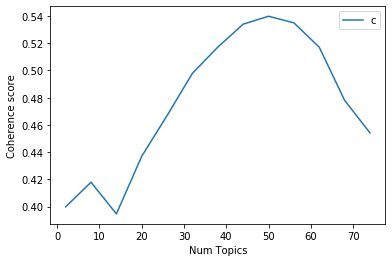

In [ ]:
import matplotlib.pyplot as plt

limit=80; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
from gensim import models

ldan = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=52, passes=80)
ldan.print_topics()

[(47,
  '0.225*"learn" + 0.216*"reinforc" + 0.094*"memori" + 0.068*"observ" + 0.052*"agent" + 0.042*"partial" + 0.042*"architectur" + 0.030*"term" + 0.027*"expert" + 0.026*"introduct"'),
 (36,
  '0.202*"model" + 0.100*"continu" + 0.092*"graphic" + 0.084*"variabl" + 0.081*"latent" + 0.064*"discret" + 0.058*"learn" + 0.040*"also" + 0.032*"manifold" + 0.030*"databas"'),
 (35,
  '0.109*"video" + 0.093*"differenti" + 0.079*"propag" + 0.075*"belief" + 0.069*"probabl" + 0.067*"coordin" + 0.067*"combinatori" + 0.053*"find" + 0.051*"oper" + 0.044*"posit"'),
 (18,
  '0.249*"distribut" + 0.168*"object" + 0.148*"recognit" + 0.112*"detect" + 0.055*"transform" + 0.038*"path" + 0.037*"diffus" + 0.037*"accur" + 0.036*"learn" + 0.027*"mine"'),
 (3,
  '0.222*"graph" + 0.135*"neuron" + 0.098*"match" + 0.070*"spike" + 0.061*"pool" + 0.049*"higher" + 0.041*"shape" + 0.033*"learn" + 0.028*"model" + 0.021*"cortic"'),
 (10,
  '0.125*"relat" + 0.125*"maximum" + 0.088*"likelihood" + 0.075*"entropi" + 0.069*"ens

In [ ]:
pyLDAvis.gensim.prepare(ldan, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
49    -0.067452  0.037111       1        1  3.893071
48    -0.055114 -0.099252       2        1  3.402229
30    -0.156627 -0.096944       3        1  2.769832
41     0.038110  0.164259       4        1  2.652756
29    -0.219786 -0.094498       5        1  2.471337
9      0.013310  0.054557       6        1  2.424924
27     0.140220 -0.076348       7        1  2.307114
43    -0.016858  0.104753       8        1  2.235034
14     0.086658  0.146879       9        1  2.217429
2      0.006751 -0.087374      10        1  2.203723
31     0.090114  0.052078      11        1  2.182253
5     -0.128194 -0.093734      12        1  2.128086
51     0.046939 -0.086684      13        1  2.111535
4      0.143915 -0.086188      14        1  2.076354
33    -0.030969 -0.090466      15        1  2.065477
18    -0.020845 -0.103750      16        1  2.038070
28     0.143866 -0.086002      17        1  2.023171
46    -0.090989 -0.089390      18        1  2.010504
17     0.143946 -0.086238      19        1  2.009791
36    -0.072423  0.207659      20        1  1.969878
6      0.143876 -0.085875      21        1  1.966090
40    -0.058498 -0.088581      22        1  1.922161
12    -0.024445  0.088241      23        1  1.912036
15    -0.156383 -0.005496      24        1  1.896498
44    -0.045091  0.079626      25        1  1.888283
20     0.060350 -0.082945      26        1  1.883010
37    -0.101290  0.032161      27        1  1.845363
50    -0.047206 -0.087252      28        1  1.843031
47    -0.214723 -0.006251      29        1  1.815394
3     -0.022045  0.063652      30        1  1.726504
7     -0.144126 -0.089767      31        1  1.725384
24     0.115922  0.152759      32        1  1.707684
13    -0.000512 -0.075141      33        1  1.707299
45    -0.103232  0.028965      34        1  1.698211
19     0.058939 -0.058546      35        1  1.687170
22     0.009417  0.085582      36        1  1.686361
0     -0.129543  0.065635      37        1  1.683228
16     0.026366 -0.098679      38        1  1.682584
42     0.144306 -0.088779      39        1  1.655258
38     0.142879 -0.080804      40        1  1.654613
32    -0.003324 -0.082457      41        1  1.599118
35    -0.004335  0.033087      42        1  1.583542
26    -0.008542  0.092632      43        1  1.556276
34     0.076138  0.065799      44        1  1.531220
39     0.014559  0.128054      45        1  1.510453
10     0.039332  0.089766      46        1  1.455111
21     0.061646  0.100560      47        1  1.395652
25     0.120788  0.092071      48        1  1.373852
23     0.042267  0.035184      49        1  1.349975
1     -0.087442  0.083432      50        1  1.336112
11    -0.040542  0.093479      51        1  1.311548
8      0.139919 -0.070539      52        1  1.218419, topic_info=          Term         Freq        Total Category  logprob  loglift
10     network  1971.000000  1971.000000  Default  30.0000  30.0000
11      neural  1836.000000  1836.000000  Default  29.0000  29.0000
76       optim  1378.000000  1378.000000  Default  28.0000  28.0000
1175      page  1059.000000  1059.000000  Default  27.0000  27.0000
62        base   966.000000   966.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
936    categor     0.037072    67.973228  Topic52 -10.6076  -3.1064
929       fmri     0.037072    29.889662  Topic52 -10.6076  -2.2848
937   document     0.037072    29.293694  Topic52 -10.6076  -2.2647
928       hmms     0.037072    15.588350  Topic52 -10.6076  -1.6338
938      reson     0.037072     5.199112  Topic52 -10.6076  -0.5358

[2128 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
706       6  0.815315      abil
825      42  0.899043   absolut
679      39  0.955812  abstract
77       43  0.990514   acceler
576      33  0.938733    access
...     ...      

In [ ]:
coherence_model_lda = CoherenceModel(model=ldan, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

print('\nPerplexity: ', ldan.log_perplexity(corpus))

Coherence Score:  0.5860449024275454

Perplexity:  -25.22437695917876
